# Linear Regression with Python Scikit Learn
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

# Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

# GRIP Task 1(Students_score_prediction)

# Author: Pratim Saha

In [1]:
# Importing all important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the dataset
df = pd.read_csv("C:/Users/Partha/Desktop/student_scores - student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Text(0, 0.5, 'Percentage Score')

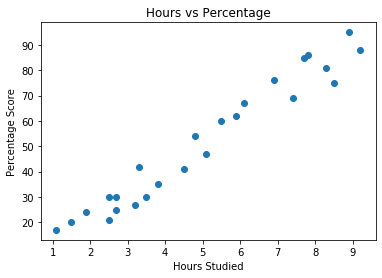

In [4]:
# Plotting the distribution of scores
plt.scatter(x=df['Hours'], y=df['Scores'])  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.


# Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [5]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

C:\Users\Partha\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\Partha\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=Tru

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [7]:
X_train, X_test ,y_train,y_test = train_test_split(X ,y , test_size=0.2 , random_state=0)

In [8]:
clf = LinearRegression()
clf.fit(X_train ,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [9]:
y_pred = clf.predict(X_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


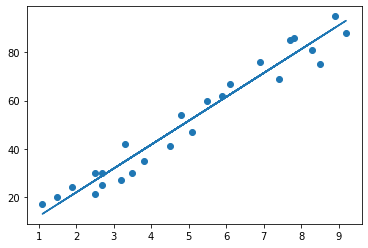

In [10]:
# Plotting the regression line
line = clf.coef_*X+clf.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [11]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({"Actual":y_test,"Predicted_Scores":y_pred})
df1

,Actual,Predicted_Scores
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [12]:
# You can also test with your own data
hours = np.array(9.25)
pred = clf.predict(hours.reshape(-1,1))
print("No of Hours = "+str(hours))
print("Predicted Score = "+str(pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [13]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error: "+str(MAE))

Mean Absolute Error: 4.183859899002975
